In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


df = pd.read_csv('Bakery_sales.csv')

In [54]:
df.head()



,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [66]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
df['unit_price'] = df['unit_price'].str.replace(',', '.').str.extract('(\d+\.\d+)', expand=False).astype(float)


In [57]:
df['Quantity'] = df['Quantity'].astype(int)
df['revenue'] = df['Quantity'] * df['unit_price']

In [58]:
df.dtypes

Unnamed: 0                int64
date                     object
time                     object
ticket_number           float64
article                  object
Quantity                  int32
unit_price              float64
datetime         datetime64[ns]
revenue                 float64
dtype: object

In [59]:
df.drop

<bound method DataFrame.drop of         Unnamed: 0        date   time  ticket_number               article  \
0                0  2021-01-02  08:38       150040.0              BAGUETTE   
1                1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2                4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3                5  2021-01-02  09:14       150041.0                  PAIN   
4                8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   
...            ...         ...    ...            ...                   ...   
234000      511387  2022-09-30  18:52       288911.0                 COUPE   
234001      511388  2022-09-30  18:52       288911.0            BOULE 200G   
234002      511389  2022-09-30  18:52       288911.0                 COUPE   
234003      511392  2022-09-30  18:55       288912.0  TRADITIONAL BAGUETTE   
234004      511395  2022-09-30  18:56       288913.0  TRADITIONAL BAGUETTE   

        Quantity  unit_price   

#  Best 5 sales of each product

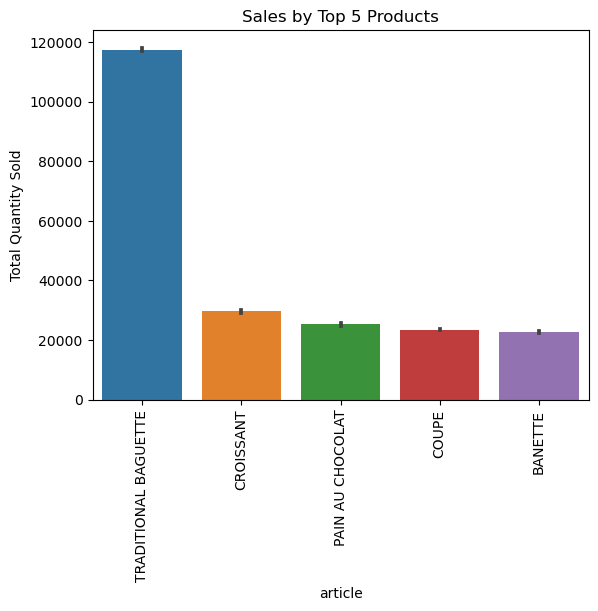

In [60]:
top_5_products = df.groupby('article')['Quantity'].sum().sort_values(ascending=False).index[:5]
sns.barplot(x='article', y='Quantity', data=df[df['article'].isin(top_5_products)], estimator=sum, order=top_5_products)
plt.ylabel('Total Quantity Sold')
plt.title('Sales by Top 5 Products')
plt.xticks(rotation=90)
plt.show()


 # Best 5 Revenues

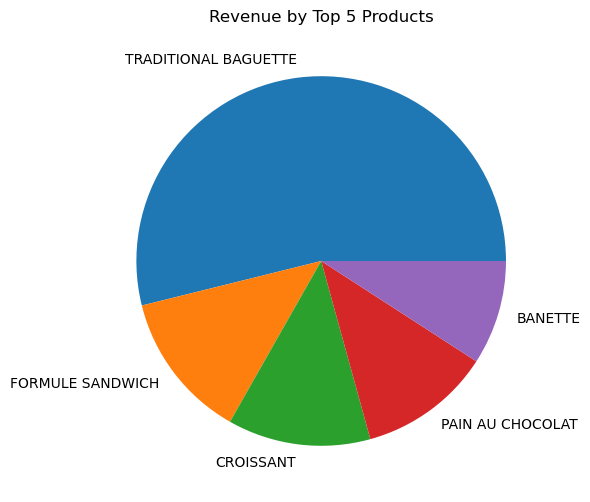

In [61]:
top_5_products_revenue = df.groupby('article')['revenue'].sum().sort_values(ascending=False).index[:5]
plt.figure(figsize=(6,6))
plt.pie(df[df['article'].isin(top_5_products_revenue)].groupby('article')['revenue'].sum().sort_values(ascending=False), labels=top_5_products_revenue)
plt.title('Revenue by Top 5 Products')
plt.show()

# average revenue for each day of the week for the top 5 products

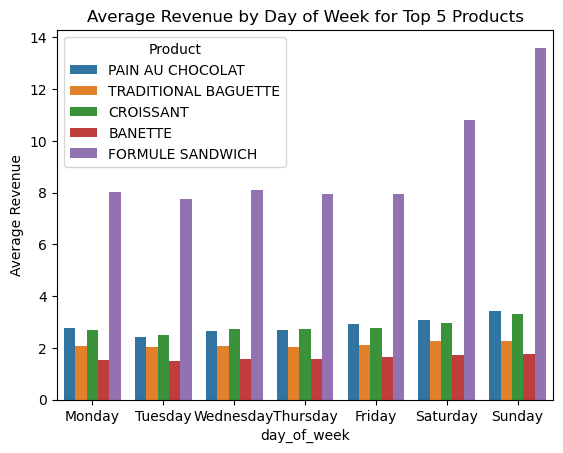

In [62]:

top_5_products_revenue= df[df['article'].isin(top_5_products_revenue)].copy()
top_5_products_revenue.loc[:, 'day_of_week'] = top_5_products_revenue['datetime'].dt.dayofweek
sns.barplot(x='day_of_week', y='revenue', data=top_5_products_revenue, estimator=np.mean, hue='article', hue_order=top_5_products_revenue['article'].unique(), ci=None)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Day of Week for Top 5 Products')
plt.legend(title='Product')
plt.show()


# Best DaySale per Week

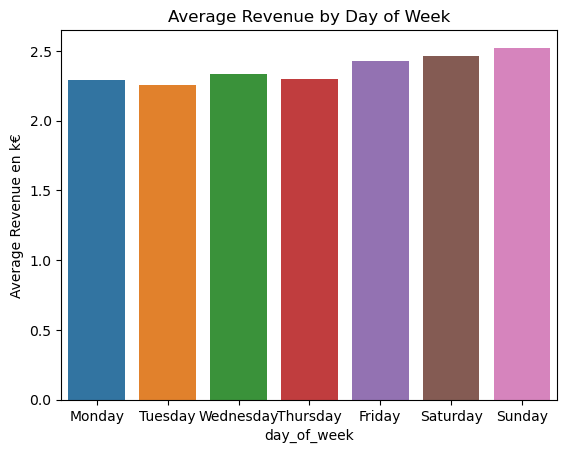

In [64]:

df['day_of_week'] = df['datetime'].dt.dayofweek
revenue_by_day = df.groupby('day_of_week')['revenue'].sum()
average_revenue_by_day = df.groupby('day_of_week')['revenue'].mean()


sns.barplot(x=average_revenue_by_day.index, y=average_revenue_by_day.values)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Average Revenue en k€')
plt.title('Average Revenue by Day of Week')
plt.show()


In [67]:
df.head()

,date,time,ticket_number,article,Quantity,unit_price,datetime,revenue,day_of_week
0,2021-01-02,08:38,150040.0,BAGUETTE,1,0.90,2021-01-02 08:38:00,0.90,5
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3,1.20,2021-01-02 08:38:00,3.60,5
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2,1.20,2021-01-02 09:14:00,2.40,5
3,2021-01-02,09:14,150041.0,PAIN,1,1.15,2021-01-02 09:14:00,1.15,5
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5,1.20,2021-01-02 09:25:00,6.00,5


In [68]:
df.tail()

,date,time,ticket_number,article,Quantity,unit_price,datetime,revenue,day_of_week
234000,2022-09-30,18:52,288911.0,COUPE,1,0.15,2022-09-30 18:52:00,0.15,4
234001,2022-09-30,18:52,288911.0,BOULE 200G,1,1.20,2022-09-30 18:52:00,1.20,4
234002,2022-09-30,18:52,288911.0,COUPE,2,0.15,2022-09-30 18:52:00,0.30,4
234003,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1,1.30,2022-09-30 18:55:00,1.30,4
234004,2022-09-30,18:56,288913.0,TRADITIONAL BAGUETTE,1,1.30,2022-09-30 18:56:00,1.30,4


# Forecasting

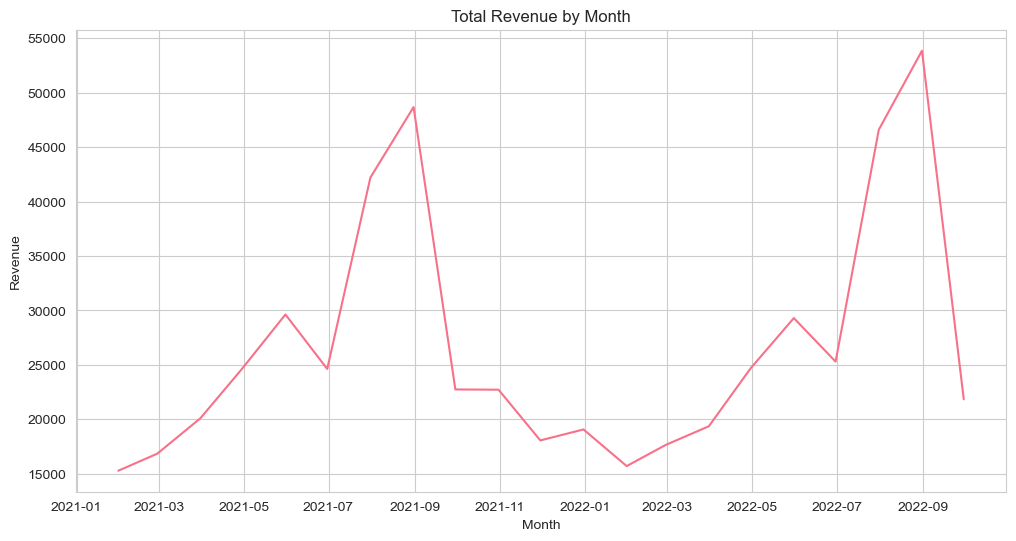

In [70]:
df_copy = df.copy()


df_copy["datetime"] = pd.to_datetime(df_copy["datetime"])


df_copy = df_copy.set_index("datetime")


monthly_revenue = df_copy["revenue"].resample("M").sum()


sns.set_style("whitegrid")
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, ax=ax)


ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
ax.set_title("Total Revenue by Month")


plt.show()

c:\Users\yskon\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\yskon\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


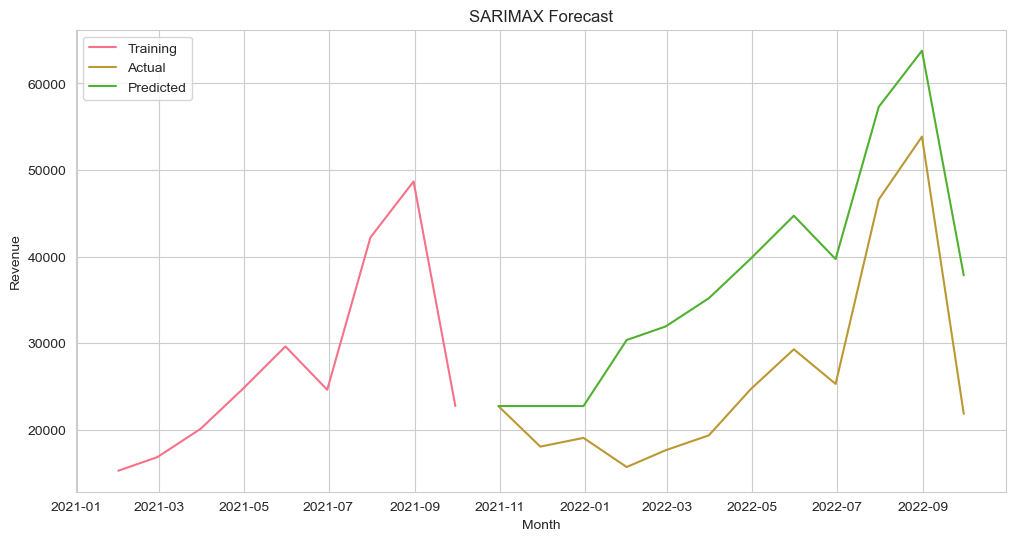

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


df_monthly = df_copy.resample('M').sum()


train = df_monthly[:-12]
test = df_monthly[-12:]


model = SARIMAX(train['revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))


model_fit = model.fit()


predictions = model_fit.predict(start=test.index[0], end=test.index[-1])


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train['revenue'], label='Training')
ax.plot(test.index, test['revenue'], label='Actual')
ax.plot(predictions.index, predictions.values, label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue')
ax.set_title('SARIMAX Forecast')
ax.legend()
plt.show()

TypeError: score() missing 1 required positional argument: 'params'